In [31]:
library(faraway)
library(mgcv)
library(psych)
library(car)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:psych’:

    logit

The following objects are masked from ‘package:faraway’:

    logit, vif



In [5]:
head(ozone)

O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
3,5710,4,28,40,2693,-25,87,250,33
5,5700,3,37,45,590,-24,128,100,34
5,5760,3,51,54,1450,25,139,60,35
6,5720,4,69,35,1568,15,121,60,36
4,5790,6,19,45,2631,-33,123,100,37
4,5790,3,25,55,554,-28,182,250,38


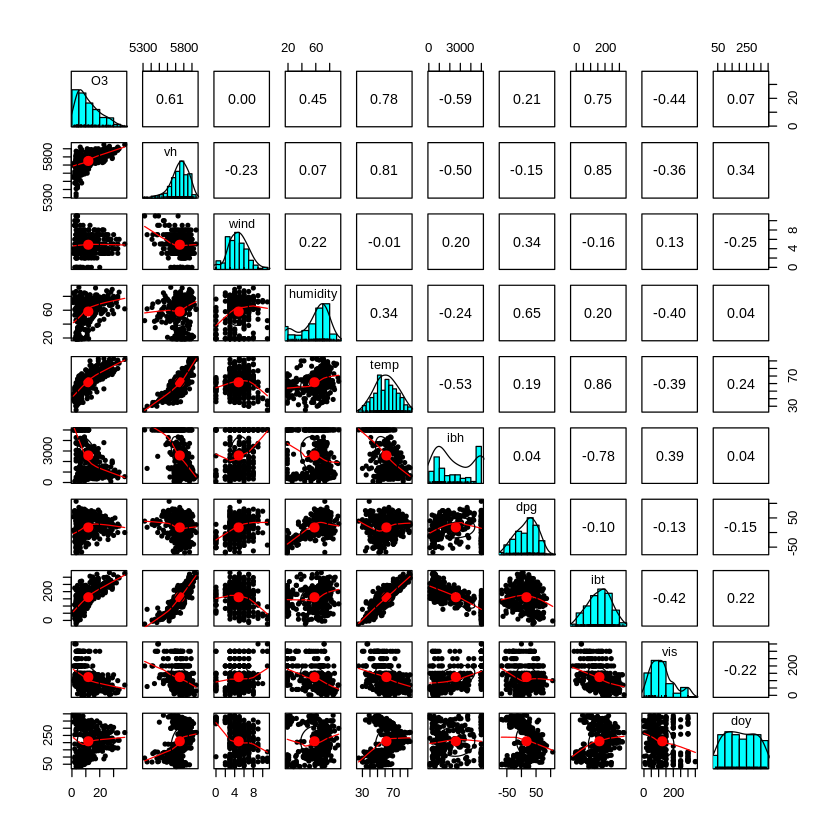

In [10]:
psych::pairs.panels(ozone)

In [117]:
model1 <- glm(1/(O3) ~ log(temp)+ibh+log(humidity),  family=Gamma(link=log), data=ozone)
AIC(model1)
BIC(model1)

[1] -1054.071

[1] -1035.076

In [115]:
model1 <- glm(1/(O3) ~ log(temp)+ibh,  family = Gamma (link=log), data=ozone)
AIC(model1)
summary(model1)

[1] -1022.083


Call:
glm(formula = 1/(O3) ~ log(temp) + ibh, family = Gamma(link = log), 
    data = ozone)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1282  -0.3788  -0.1484   0.1912   1.8000  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.734e+00  5.785e-01   9.911  < 2e-16 ***
log(temp)   -1.991e+00  1.347e-01 -14.784  < 2e-16 ***
ibh          1.200e-04  1.855e-05   6.466 3.66e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.2671993)

    Null deviance: 190.506  on 329  degrees of freedom
Residual deviance:  68.786  on 327  degrees of freedom
AIC: -1022.1

Number of Fisher Scoring iterations: 6


In [111]:
model2 <- gam(1/(ozone$O3) ~ s(log(ozone$temp))+s(ozone$ibh)+s(log(ozone$humidity)), family=Gamma(link=log), data=ozone)

In [98]:
AIC(model2)
BIC(model2)

[1] -1093.686

[1] -1048.779

In [100]:
car::vif(model1)

log(temp)           ibh log(humidity) 
     1.429345      1.402371      1.109899